<h1 align="center"> Movie Recommendation System </h1>

## Introduction
Movies have been a part of our culture for a long time now. It all started with the plays which dates back to 5th century BC. Short films which where projected during 1890's is considered as the breakthrough in film industry. 20th century can be said as a catalyst for the growth of the industry where the movies and the technologies used evolved. Industry has been through many faces such as 
- Silent Era
- Rise of Hollywood
- Golden Era
- Appearances of Blockbusters
- Modern film industry<br><br>
    Now the industry has matured and has turned into a $ 40 Billion dollar industry with USA being the third largest behind China and India in terms of tickets sold.<br>
    **USA** has housed world famous production houses namely Warner Bros, Sony Motion Pictures, Walt Disney, Universal Pictures to name a few.

## Problem Statement
Movies made by the production houses primarily aims at making there movies Likeable and Profitable. Suppose production houses are interested in answering the following question

**What are the factors to be considered to make a successful movie?**


## Objective
- To analyze the factors affecting the success of the movie like gross, facebook likes, critic reviews, Imdb Score etc
- To recommend suitable director, cast, plot based on the choosen genre to make our movie profitable

## Data
- To analyze the mentioned problem [IMDB-5000-Movie-Dataset](https://data.world/popculture/imdb-5000-movie-dataset) was obtained from [data.world](https://data.world)
- Our data consist of 5048 movies from the year 1916 to 2016
- Each observation represents the individual movie produced with various fields such as title, year, director, cast etc with the total of **5048 rows and 28 columns**.

## Feature engineering 
- Genre column contains multiple values delimited with pipe operator ( ' | ' ) excel was used to make them into individual columns. Top 3 Genres are only considered and named as genre_1, genre_2, genre_3. Now our data set contains 5048 rows and 30 columns
<br>These modifications where done using **excel** . After initial modifications the data is loaded onto python using pandas for further analysis

## Exploratory Data Analysis

In [1]:
# importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as stm

In [2]:
# Loading the data into the dataframe

df = pd.read_csv('movie_metadata.csv')

# Displaying 5 samples of the dataset
df.sample(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
3331,Color,Joel Schumacher,147.0,97.0,541.0,673.0,Jami Gertz,967.0,32222567.0,Comedy|Fantasy|Horror,...,339.0,English,USA,R,NaN,1987.0,847.0,7.2,2.35,19000
2186,Color,Stephen Kay,140.0,89.0,19.0,349.0,Skye McCole Bartusiak,526.0,46363118.0,Drama|Horror|Mystery|Thriller,...,389.0,English,USA,PG-13,20000000.0,2005.0,392.0,4.1,1.85,1000
753,Color,Michael Caton-Jones,83.0,124.0,105.0,460.0,Bruce Willis,24000.0,54910560.0,Action|Adventure|Crime|Thriller,...,227.0,English,USA,R,60000000.0,1997.0,13000.0,6.3,2.35,0
2133,Color,Trey Parker,163.0,81.0,406.0,406.0,Eric Idle,893.0,52008288.0,Animation|Comedy|Fantasy|Musical,...,928.0,English,USA,R,21000000.0,1999.0,795.0,7.8,1.85,0
981,Color,John Landis,36.0,104.0,644.0,174.0,Jon Tenney,437.0,42610000.0,Action|Comedy|Crime|Thriller,...,114.0,English,USA,R,55000000.0,1994.0,289.0,5.5,1.85,669


In [3]:
# To understand the data we can use describe function which gives important metrics for all numerical values

df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [4]:
#To understand about the missing values in the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [5]:
# To better understand the count of the missing values
df.isnull().sum().sort_values(ascending=False)

gross                        884
budget                       492
aspect_ratio                 329
content_rating               303
plot_keywords                153
title_year                   108
director_name                104
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_name                  23
actor_3_facebook_likes        23
num_user_for_reviews          21
color                         19
duration                      15
facenumber_in_poster          13
actor_2_name                  13
actor_2_facebook_likes        13
language                      12
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
movie_facebook_likes           0
genres                         0
movie_title                    0
num_voted_users                0
movie_imdb_link                0
imdb_score                     0
cast_total_facebook_likes      0
dtype: int64

Since Gross and Budget are important fields with many missing values.. Lets look into the distribution of it

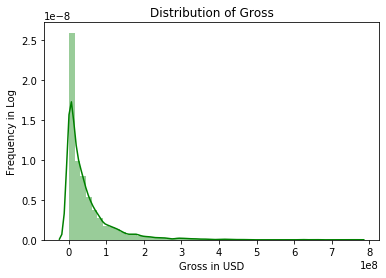

Mean: 48468407.53
Median: 25517500.00


In [6]:
# Distribution of the Gross
sns.distplot(df.loc[df.gross.isna()==False,'gross'],color='g')
plt.title('Distribution of Gross')
plt.xlabel('Gross in USD')
plt.ylabel('Frequency in Log')
plt.show()
print(f'Mean: {df.gross.mean():.2f}')
print(f'Median: {df.gross.median():.2f}')

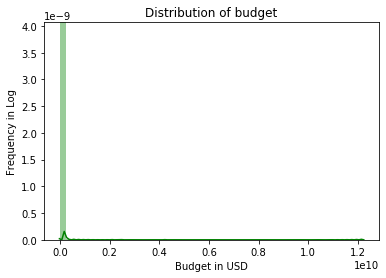

Mean: 39752620.44
Median: 20000000.00


In [7]:
# Distribution of the Budget
sns.distplot(df.loc[df.budget.isna()==False,'budget'],color='g')
plt.title('Distribution of budget')
plt.xlabel('Budget in USD')
plt.ylabel('Frequency in Log')
plt.show()
print(f'Mean: {df.budget.mean():.2f}')
print(f'Median: {df.budget.median():.2f}')

- It is clear that both the distribution are highly skewed to the right and imputing median will be a better approach.
- Since the data spans over a period of 100 years imputing values with the median of the entire series will be wrong as the money value changes over time.

**Imputing with the median of the corresponding year will be a better approach**

In [8]:
# Grouping by title_year and imputing gross and budget with median.
df.loc[df.gross.isnull(), 'gross'] = df.groupby('title_year')['gross'].transform('median')
df.loc[df.budget.isnull(), 'budget'] = df.groupby('title_year')['budget'].transform('median')

In [9]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        130
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       100
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [10]:
# Dropping values with both gross and budget that is not available

df.drop(df.index[(df.gross.isna() == True) & 
    (df.budget.isna() == True)], inplace=True)

In [11]:
df.shape

(4946, 28)

In [12]:
df.isnull().sum().sort_values(ascending=False)

aspect_ratio                 309
content_rating               264
plot_keywords                140
num_critic_for_reviews        42
gross                         33
actor_3_facebook_likes        19
actor_3_name                  19
num_user_for_reviews          15
color                         15
facenumber_in_poster          13
duration                      12
actor_2_name                  11
title_year                    11
director_facebook_likes       11
actor_2_facebook_likes        11
director_name                 11
language                       9
actor_1_name                   7
actor_1_facebook_likes         7
budget                         3
country                        1
movie_facebook_likes           0
genres                         0
movie_title                    0
num_voted_users                0
movie_imdb_link                0
imdb_score                     0
cast_total_facebook_likes      0
dtype: int64

Dropping these 97 observation actually reduced the number of null values in director_name and director_facebook_likes. Since the number of Null Values is within 1% of the total observation for prime factors we can proceed with our analysis

### Hypothesis 1 : Is Gross of the movie related to budget ?

In [13]:
print(f"In the year {df.groupby('title_year')['gross'].count().idxmax()}",end='')
print(f" there were about {df.groupby('title_year')['gross'].count().max()} movies released, which maximum as per our data")

In the year 2009.0 there were about 260 movies released, which maximum as per our data


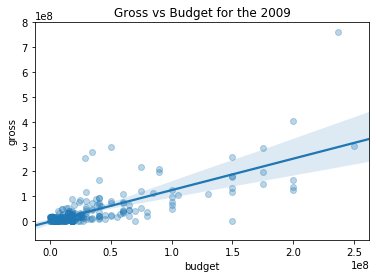

In [14]:
# Plotting regplot for 2009
sns.regplot(df.loc[df.title_year==2009,'budget'],df.loc[df.title_year==2009,'gross'],scatter_kws={'alpha':0.3})
plt.title('Gross vs Budget for the 2009')
plt.show()

We can observe that there is linear relationship between the gross and the budget. This is only for the year with maximum number of movies for the given year. In order to simulate the time series over all the years we use **Tableau**.

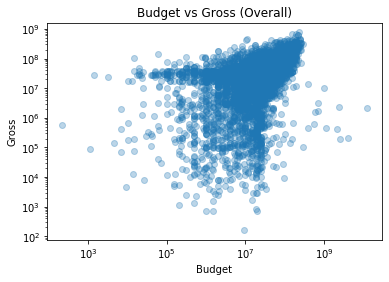

In [16]:
# Plotting the reggression line for all the years
plt.scatter(df.budget,df.gross,alpha=0.3)
plt.title(r'Budget vs Gross (Overall)')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.xscale('log')
plt.yscale('log')
plt.show()

From the above graph it is clear that our hypothesis holds because we can see a linear relationship between the Budget and the Gross.

### Hypothesis 2: Best genre to make successful movie in the current era

Before getting into current era lets explore the best movie genre of all time by plotting the highest gross movies and understanding the number of movies in individual genre.

![png](/projects/movie/tree.png)

The size of the tree represents the number of movies released in that particular genre and the color of the genre represents the Average gross of that particular genre.

From this we are able to interpret that even though the number of movies produced in the animation genre is less the gross obtained from it is about 80 M USD. 
Adventure contains a considerably large number of movies and the gross obtained on average is also $80 M

Now lets explore the trend of the current decade 2010-2016

![png](/projects/movie/2010.png)

From the graph it is clear that the average gross from the **animation and family** is higher and the number of movies released in the genre are less our production company can use this opportunity and capitalize on it.

### Hypothesis 3: Common Plots of successful movies?

For this we can use field plot_keywords to arrive at the keywords which occur more often in the profitable movies of the particular genre. Based on the keywords frequency we can make a plot out of it.

### References
1. [statista](https://www.statista.com/statistics/237749/value-of-the-global-entertainment-and-media-market/)
2. [History of Film](https://en.wikipedia.org/wiki/History_of_film)
3. [Box office](https://en.wikipedia.org/wiki/Box_office)
